 ## Análise de Dados de RH (Recursos Humanos)
Uma  empresa  de  consultoria que  atua  em  Big  Data  e  Data  Science  deseja  contratar Cientistas de Dados entre pessoas que obtenham aprovação em alguns cursos ministrados pela empresa. Muitas pessoas se inscrevem para o treinamento. A empresa quer saber quais desses candidatos realmente querem trabalhar para a empresa após o treinamento ou estão apenas fazendo o treinamento para retornarem ao mercado à procura de um novo emprego. O objetivo é  contratar  os  profissionais  com  perfil  adequado, a  fim  dereduzir  o  custo  e  o  tempo de contratação, bem como a qualidade do treinamento ou planejamento dos cursos e categorização dos candidatos. 
 
Deste modo, como analista , vou compreender como  estão  organizados,  realizar  limpeza e  transformação  dos  dados  conforme  necessário, detectar eventuais padrões e diagnósticose ao final emitir um parecer com um resumo sobre os dados.

### Versão da Lingagem Python

In [1]:
from platform import python_version
print("A versão Python Utlizada neste Jupyter é : ", python_version())

A versão Python Utlizada neste Jupyter é :  3.9.15


### Pacotes

In [2]:
!pip install -q -U watermark

In [3]:
!pip install -q missingno

In [4]:
!pip install -q category_encoders

In [5]:
!pip install -q plotly

### IMPORTS

In [6]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Carregando os Dados

In [7]:
df = pd.read_csv("dataset/aug_train.csv")

In [8]:
df.shape

(19158, 14)

In [9]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [10]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

### Análise Exploratória de Dados

In [12]:
# Ddados não númerico
df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [13]:
#Dados Númericos
df.describe().drop(columns=["enrollee_id", "target"])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


A Variavel **"enrollee_id"** representam uma identificação! 
A Variavel **"target"** é categorica! 

A Variável **city_development_index** mostra que a maioria dos candidatos é de cidade desenvolvida.
A Variável **training_hours** mostra que em média, os candidadtos levam muito tempo para concluir o treinamento.

### Visualização das Variaveis Categóricas

In [14]:
list(df.columns)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

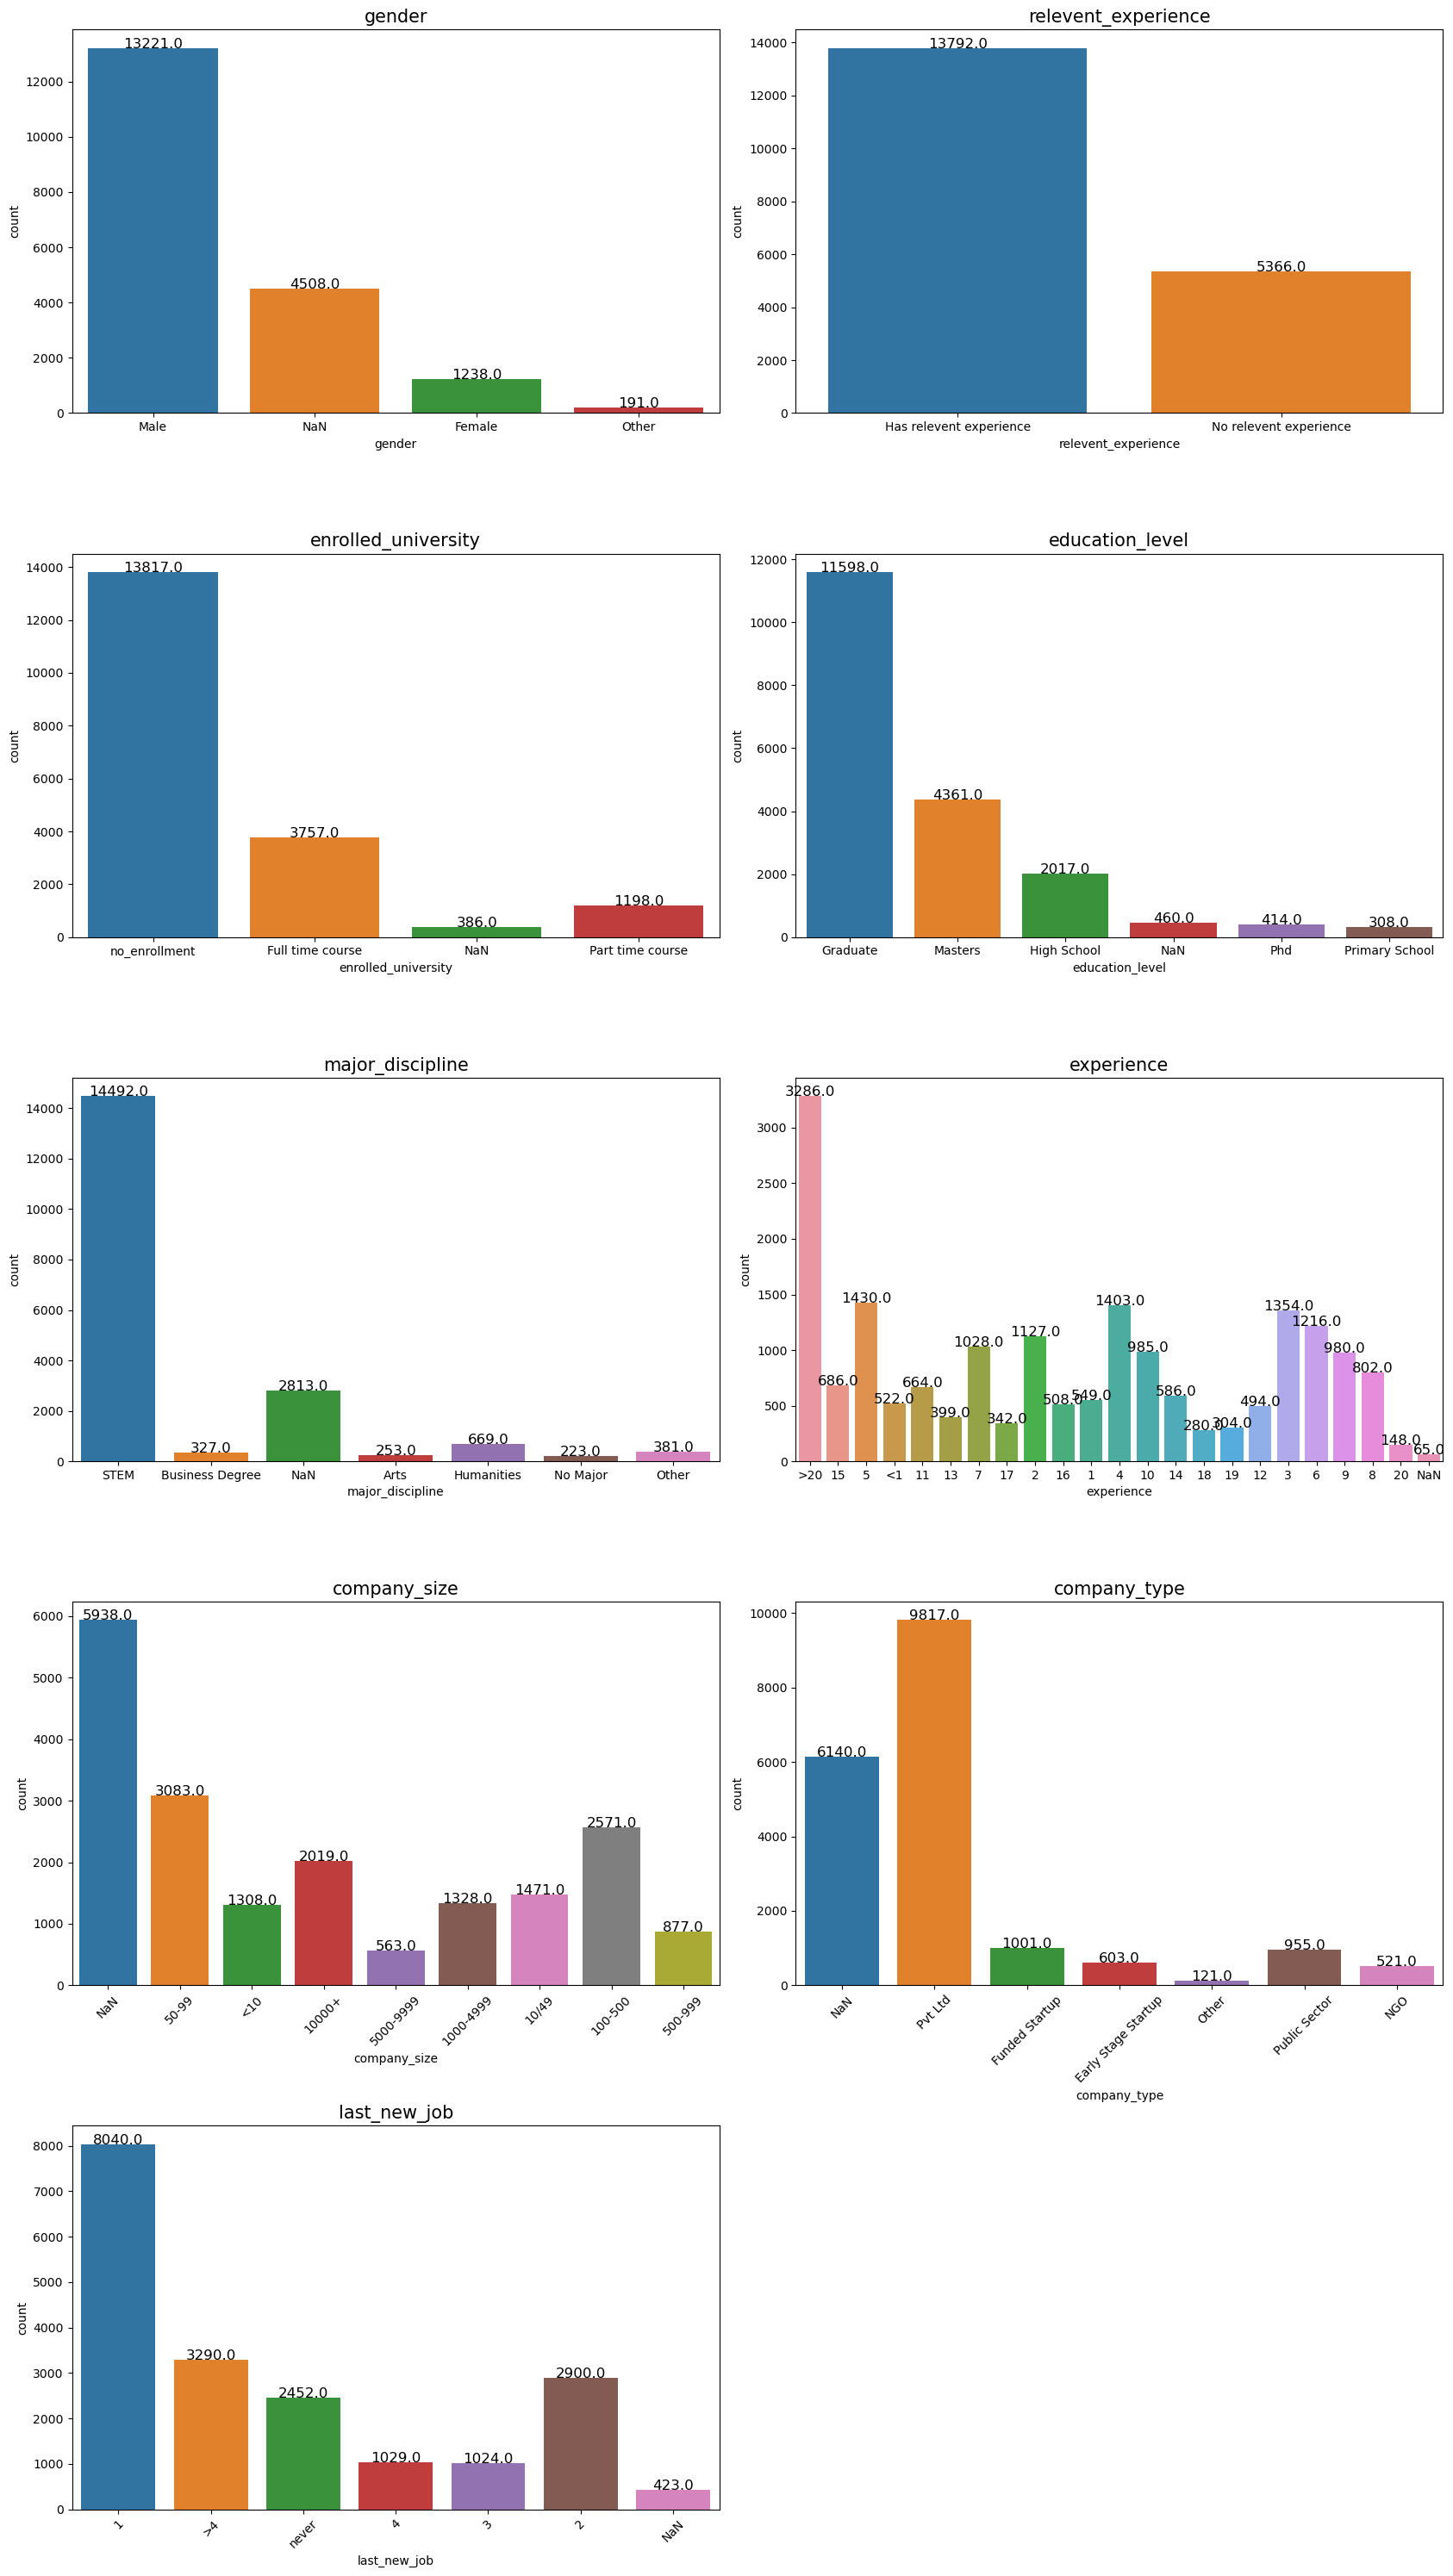

In [15]:
#tamanho da figura

plt.figure(figsize=(17,30))

list_columns = list(df.columns)[3:12]

A = 0
for i in list_columns:
    A+=1
    plt.subplot(5,2,A)
    ax = sns.countplot(data = df.fillna("NaN"), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >= 7:
        plt.xticks(rotation = 45)

# Layout
plt.tight_layout(h_pad = 2)

### Verificação a Distribuição das Variáveis Númericas

In [16]:
df.describe().drop(columns=["target","enrollee_id"])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


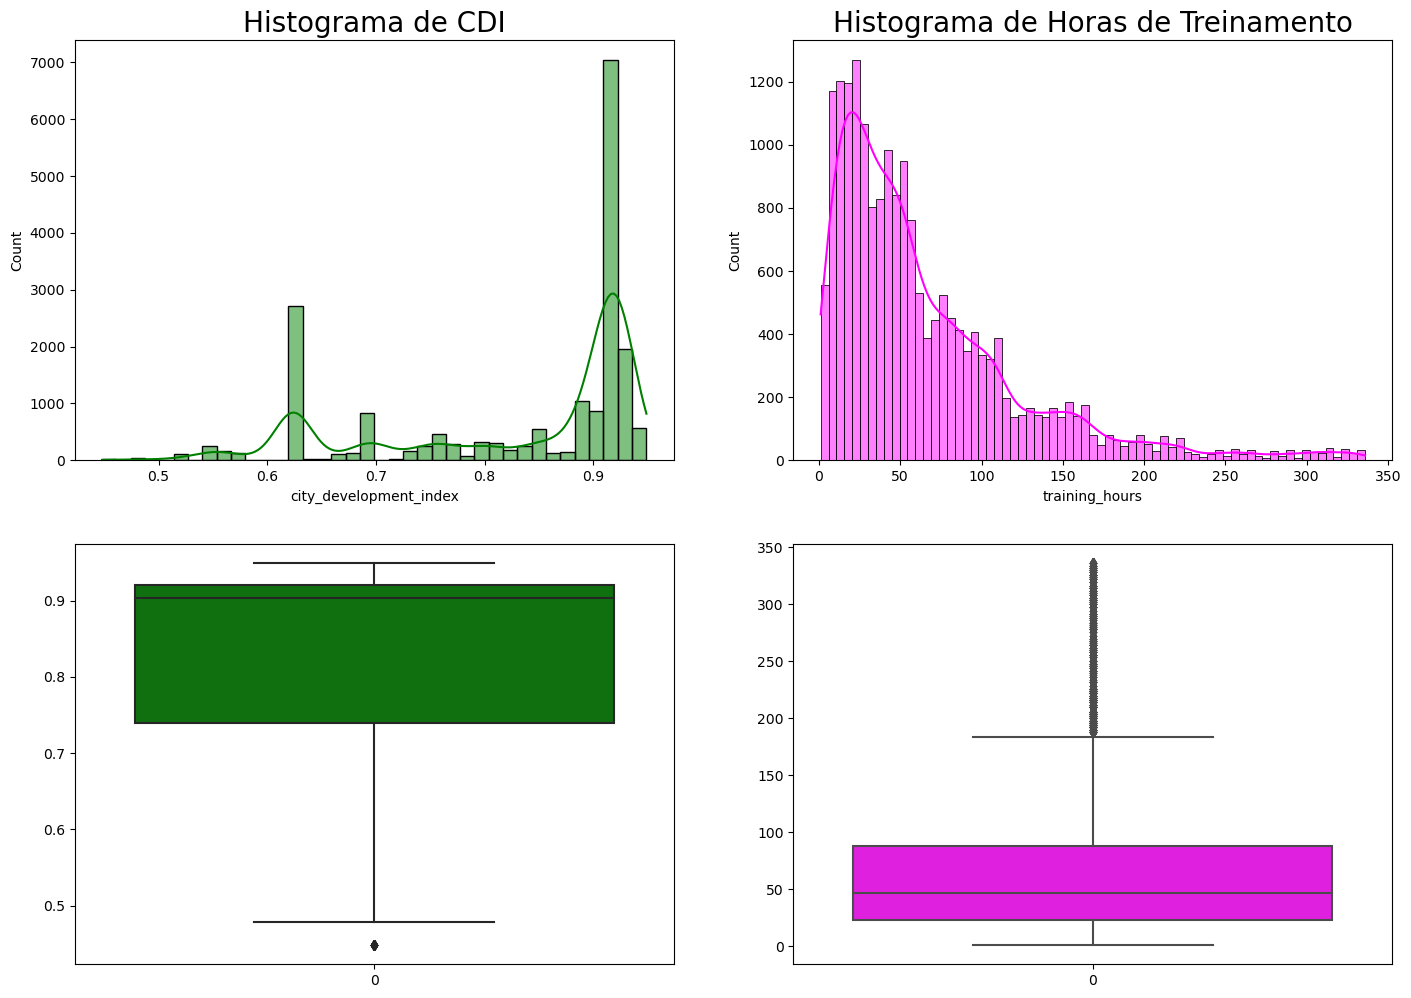

In [17]:
#FIGURA

plt.figure(figsize=(17,12))

#histogramas
plt.subplot(221)
sns.color_palette("hls",8)
sns.histplot(df["city_development_index"], kde = True , color = "green")
plt.title("Histograma de CDI", fontsize = 20)

plt.subplot(222)
sns.histplot(df["training_hours"], kde = True , color = "magenta")
plt.title("Histograma de Horas de Treinamento", fontsize = 20)

#boxplot
plt.subplot(223)
sns.boxplot(df["city_development_index"], color = "green")

plt.subplot(224)
sns.boxplot(df["training_hours"], color = "magenta")

plt.show()

As variaveis não seguem uma distribuição normal.(Formato de Sino)

Desta forma vou realizar outro Teste e escolher uma técnica para validar a variável.

### Teste de Distribuição

In [18]:
V = ["city_development_index","training_hours"]
 
for i in V:
    stats,pval = normaltest(df[i])
    
    if pval > 0.05: 
        print(i,": Distribuição Normal")
    else:
        print(i, ": Distribuição não Normal")
    

city_development_index : Distribuição não Normal
training_hours : Distribuição não Normal


Confirmado.

Para a análise númerica, vou usar o método não paramétrico. 

### Correlação dos Dados

In [19]:
df.describe().drop(columns=["target","enrollee_id"])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


In [20]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [21]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [22]:
df_numerico = df.copy()

In [23]:
df_numerico.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [24]:
df_numerico["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [25]:
df_numerico["last_new_job"].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [26]:
df_numerico["experience"] =np.where(df_numerico["experience"] == '>20', 21 , df_numerico["experience"])

In [27]:
df_numerico["experience"] =np.where(df_numerico["experience"] == '<1', 1 , df_numerico["experience"])

In [28]:
df_numerico["experience"] = df_numerico["experience"].astype("float")

In [29]:
df_numerico["last_new_job"] =np.where(df_numerico["last_new_job"] == '>4', 5 , df_numerico["last_new_job"])

In [30]:
df_numerico["last_new_job"] =np.where(df_numerico["last_new_job"] == 'never',0 , df_numerico["last_new_job"])

In [31]:
df_numerico["last_new_job"] = df_numerico["last_new_job"].astype("float")

In [32]:
df_numerico.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,1.0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0


In [33]:
df_numerico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

In [34]:
df_numerico.drop("enrollee_id", axis = 1).corr("spearman")

,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.300997,0.182698,0.007491,-0.279165
experience,0.300997,1.000000,0.473284,0.003569,-0.183721
last_new_job,0.182698,0.473284,1.000000,0.002959,-0.082045
training_hours,0.007491,0.003569,0.002959,1.000000,-0.014126
target,-0.279165,-0.183721,-0.082045,-0.014126,1.000000


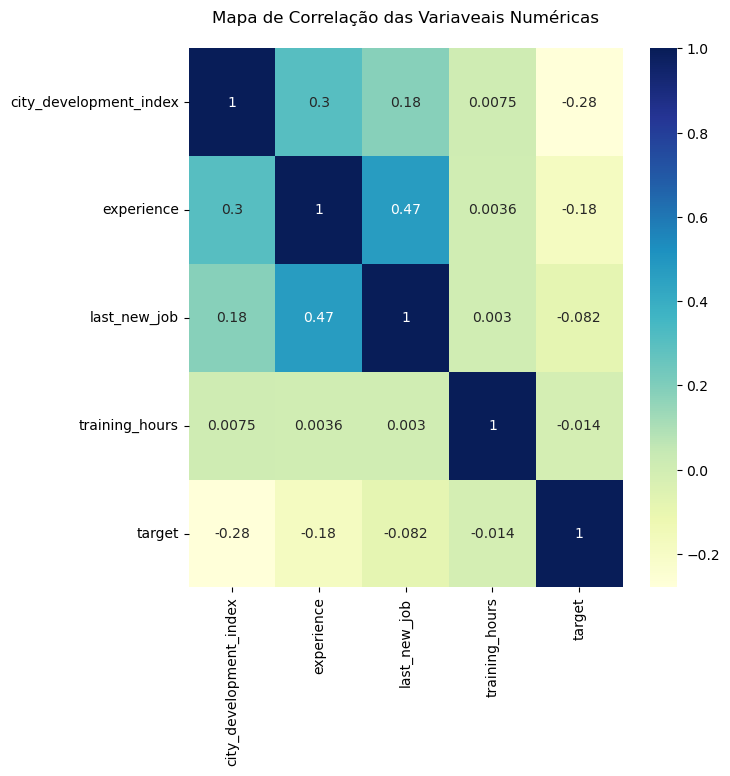

In [35]:
#Heatmap
plt.figure(figsize=(7,7))
sns.heatmap(df_numerico.drop("enrollee_id", axis = 1).corr("spearman"), annot = True , cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variaveais Numéricas\n")
plt.show()

Pela Correlação , last_new_job e experience tem uma correlação média(0.43) em relação as outras variáveis.

As variaáveis last_new_job e training_hours tem uma correlação próxima de zero com a variavel alvo e podem ser descartadas.

Para relação entre as Variáveis categóricas e a alvo, vou usar peso de evidencias.

< 0.02, não deve ser usado para previsão

0.02 -0.1, preditor fraco

0.1 -0.3, preditor médio

0.3 -0.5, preditor forte

0.5, parece bom demais para ser verdade



*** WOE(Weight of Evidence) & IV(Information Value) ***

In [36]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [37]:
#loop

for i in df.drop(columns =['target',
                           'enrollee_id',
                           'city',
                           'city_development_index',
                           'training_hours',
                           'last_new_job',
                           'company_type']).columns:
    
    df_woe_iv = (pd.crosstab(df[i],df['target'], normalize ='columns')
                .assign(woe = lambda dfx: np.log(dfx[1]/dfx[0]))
                .assign(iv = lambda dfx: np.sum(dfx['woe']* (dfx[1]-dfx[0]))))
    
    print(df_woe_iv, '\n-----------------------------------------------------------')
    
    


target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
-----------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
-----------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
-----------------------------------------------------------
target                0.0      

<Figure size 1000x1200 with 0 Axes>

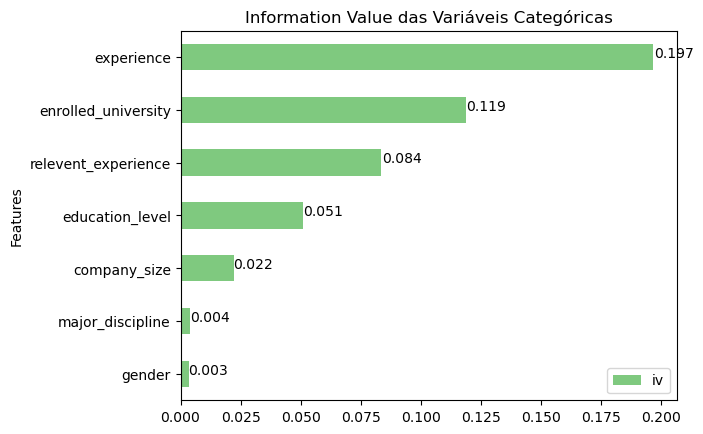

In [38]:
#plot do information

columns_cat = df.drop(columns =['target',
                           'enrollee_id',
                           'city',
                           'city_development_index',
                           'training_hours',
                           'last_new_job',
                           'company_type']).columns

#Lista
iv =[]

# loop
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])

# Dataframe
df_iv = pd.DataFrame({'Features':columns_cat,'iv':iv}).set_index('Features').sort_values(by = 'iv')

# Plot
# Figura
plt.figure(figsize = (10,12))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', colormap = "Accent")
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc  = "lower right")
plt.show()


As variáveis Experience, enrolled_university, são premeditor médio. 
os restantes são fracos.

### Identificando Valores Ausentes

In [39]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


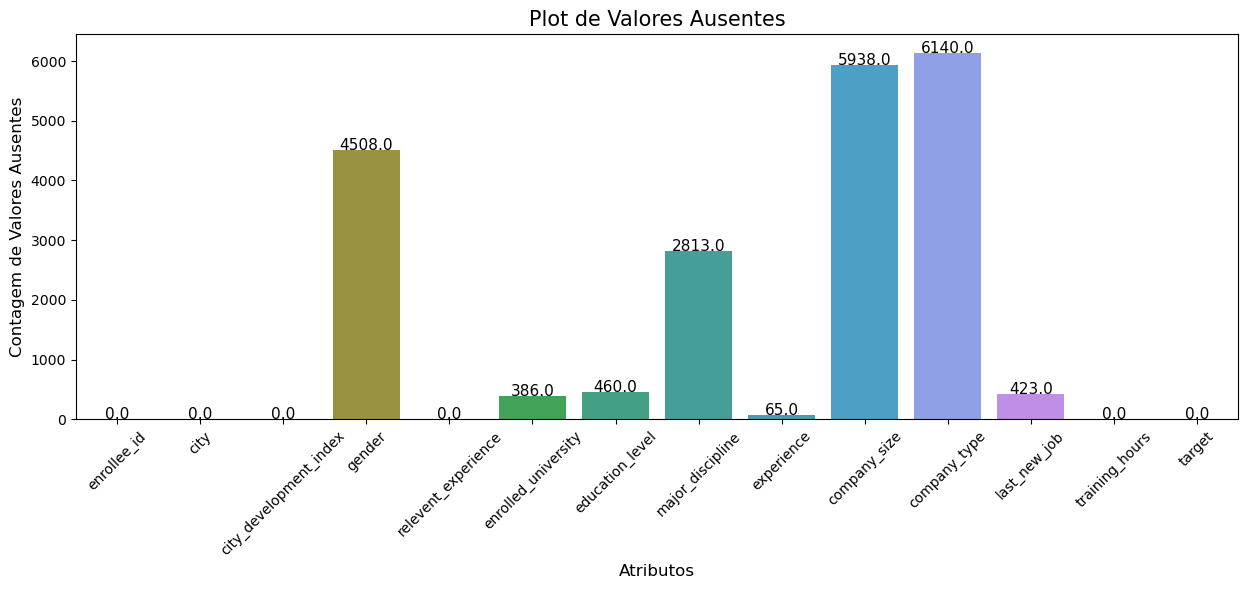

In [43]:
#Valores ausentes por coluna
null_df = df.isna().sum().reset_index()

#Figura
ax = plt.figure(figsize = (15,5))

#Barplot
ax = sns.barplot(x = null_df['index'], y = null_df[0],  palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

### Mapa de Valores Ausentes

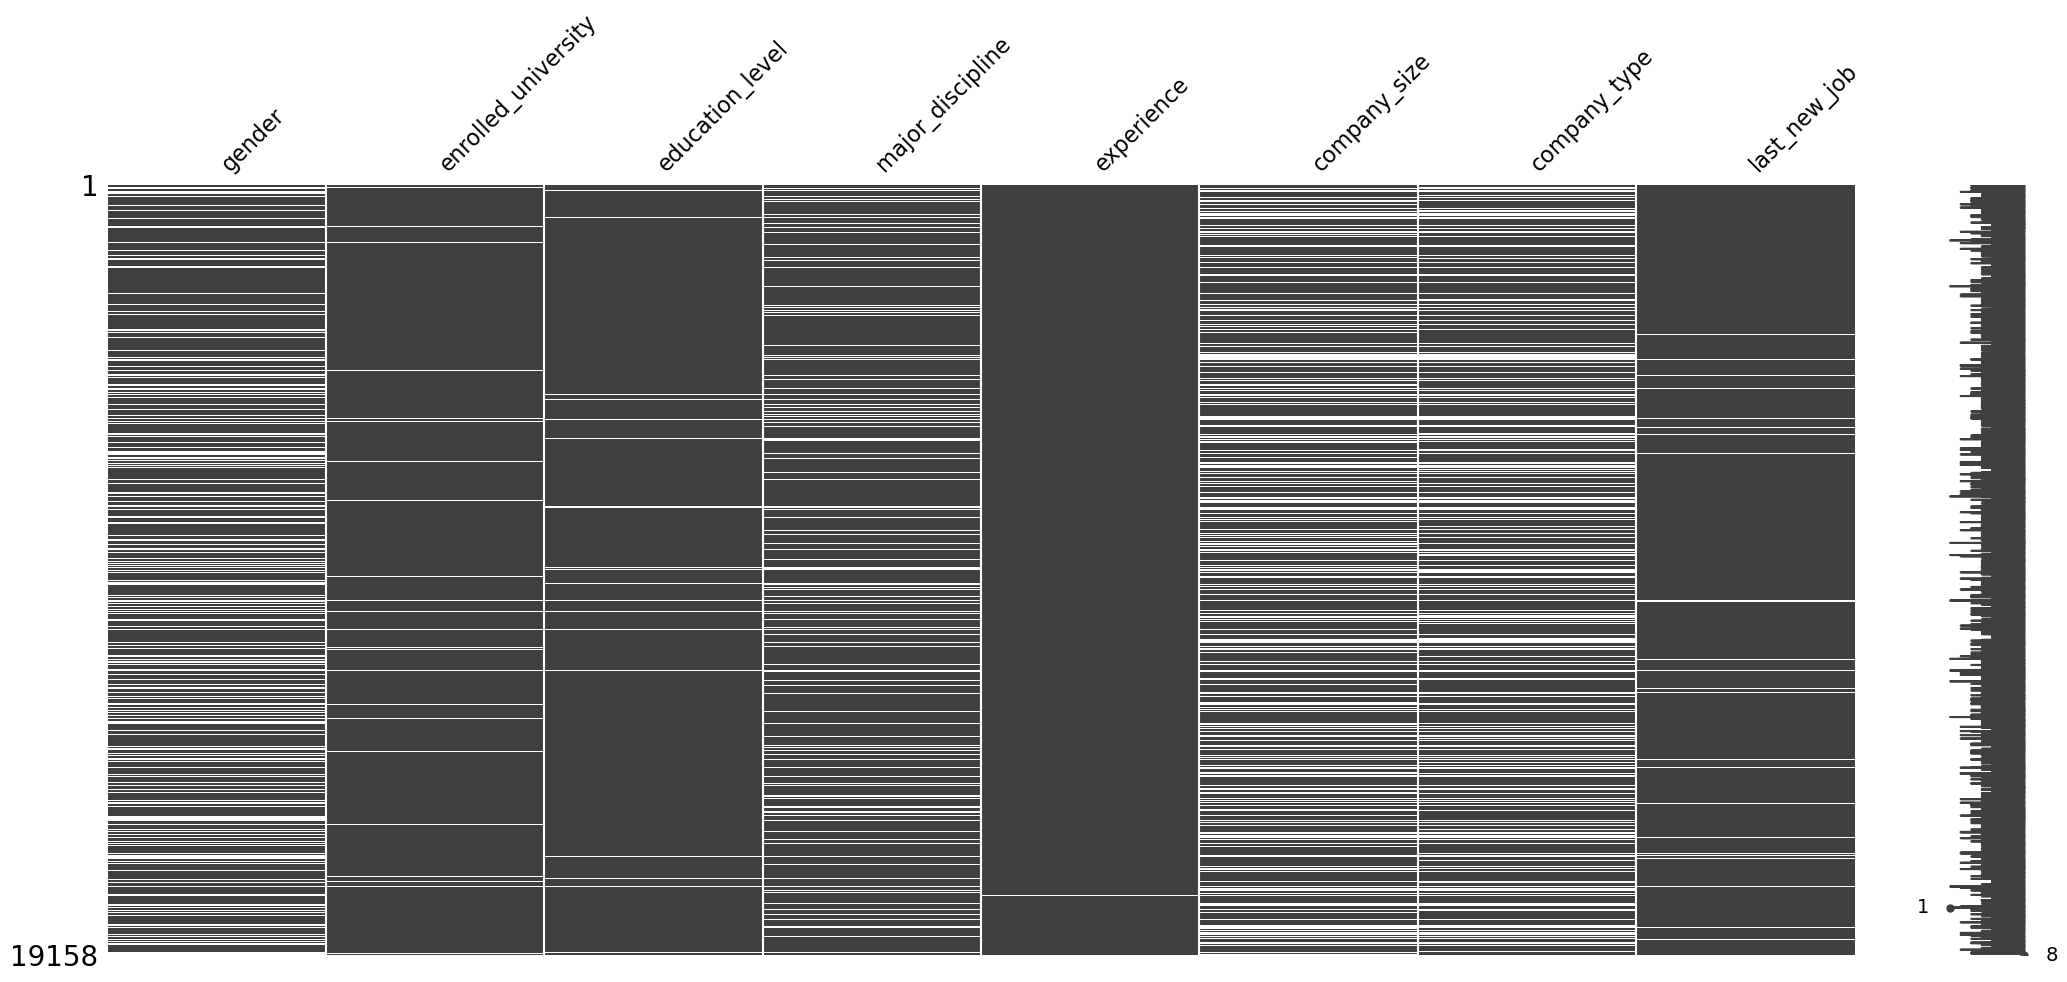

In [45]:
df_nan = pd.DataFrame(df.isna().sum())

if df.isna().any(axis=None):
    missingno.matrix(df[df_nan[df_nan[0]>0].index])
    plt.show()

Não existe um padrão de valores ausentes.

In [47]:
### Valores Duplicados
df["enrollee_id"].duplicated().sum()

0

### Limpeza e Processamento dos Dados

##### Tratamento de Valores Ausentes

In [48]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [49]:
colunas_manter = ['city_development_index', 
                  'experience', 
                  'enrolled_university', 
                  'relevent_experience', 
                  'education_level',
                  'company_type',
                  'major_discipline',
                  'target']

In [50]:
new_df = df[colunas_manter]

In [51]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


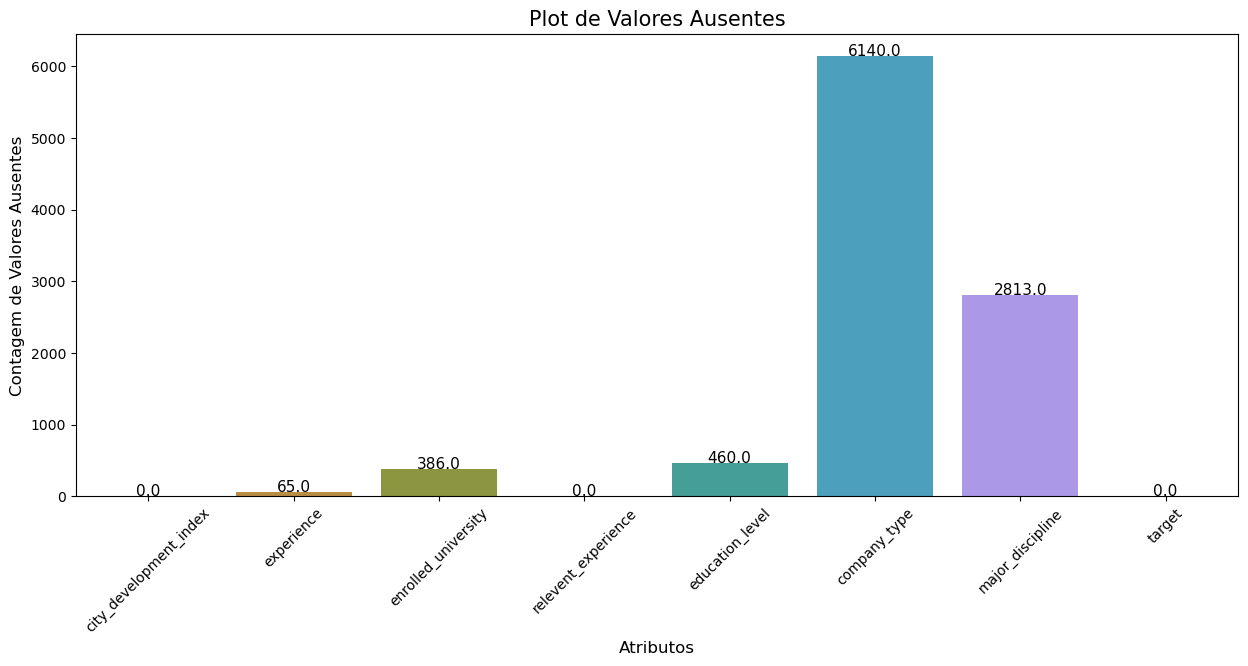

In [57]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,6))

# Barplot
ax = sns.barplot(x = null_df['index'], y = null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

*** Variável major discipline ***

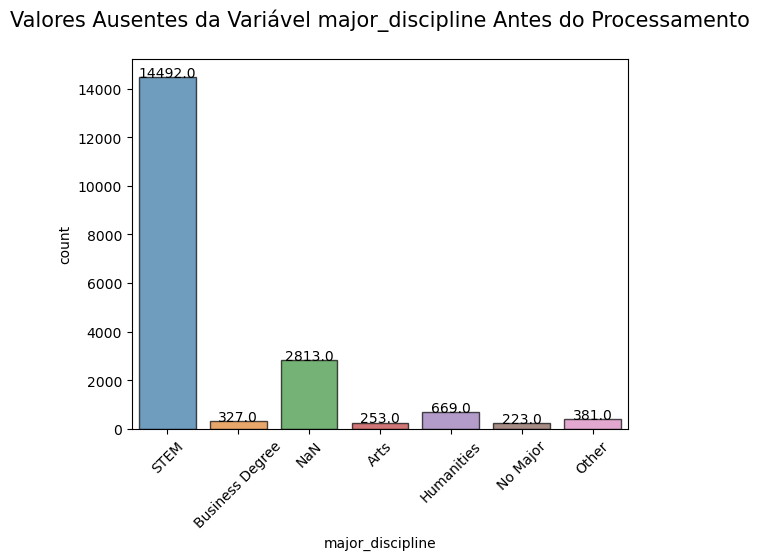

In [54]:
sns.countplot( data = new_df.fillna("NaN"), x = 'major_discipline', alpha = 0.7 , edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável major_discipline Antes do Processamento\n", fontsize = 15)
plt.show()

In [58]:
# Relação entre major_discipline x education_level
print('\nTotal de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['major_discipline'].isna()]['education_level'].value_counts(dropna = False)


Total de Valores Ausentes na Variável major_discipline: 2813

Proporção de Valores Ausentes na Variável education_level:


High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

In [59]:
#índice
nan_index = (new_df[(new_df['major_discipline'].isna()) & ((new_df['education_level']=='High School') | (new_df['education_level'].isna()) | (new_df['education_level']=='Primary School'))]).index


In [60]:
new_df['major_discipline'][nan_index] = 'Non Degree'

In [61]:
print('Total de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
new_df['major_discipline'].value_counts(dropna = False)

Total de Valores Ausentes na Variável major_discipline: 28


STEM               14492
Non Degree          2785
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
NaN                   28
Name: major_discipline, dtype: int64

Graduate tem 22 valores ausentes

Masters tem 6 valores ausentes

somando(28 valores ausentes). Vou atribuir a categoria other.

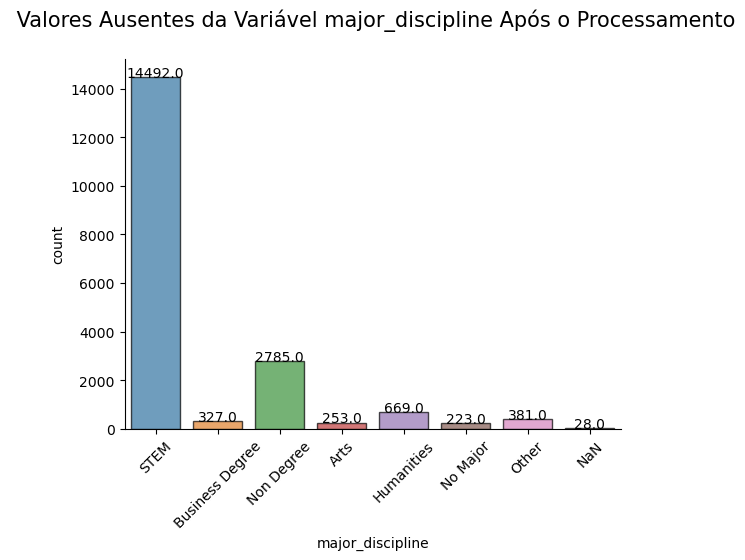

In [62]:
# Valores Ausentes da Variável major_discipline Após o Processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks(rotation=45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title(" Valores Ausentes da Variável major_discipline Após o Processamento\n", fontsize = 15)
plt.show()

In [64]:
new_df[new_df['major_discipline'].isna()]  = 'Other'

#### Variável enrolled_university

In [65]:
print('\nTotal de Valores Ausentes na Variável enrolled_university:', new_df['enrolled_university'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)


Total de Valores Ausentes na Variável enrolled_university: 385

Proporção de Valores Ausentes na Variável education_level:


Graduate          170
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

In [66]:
nan_index = (new_df[(new_df['enrolled_university'].isna()) & (new_df['education_level']=='Primary School')]).index

In [67]:
new_df['enrolled_university'][nan_index] = 'Primary Grad'

In [68]:
print('Total de Valores Ausentes:', new_df['enrolled_university'].isna().sum())
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)

Total de Valores Ausentes: 376


Graduate       170
NaN            100
Masters         53
High School     47
Phd              6
Name: education_level, dtype: int64

In [69]:
nan_index = new_df[(new_df['enrolled_university'].isna())].index

In [70]:
new_df['enrolled_university'][nan_index] = 'Other'

In [71]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


*** Variável company_type ***

In [72]:
new_df['company_type'].value_counts(dropna = False)

Pvt Ltd                9802
NaN                    6129
Funded Startup         1001
Public Sector           953
Early Stage Startup     603
NGO                     521
Other                   149
Name: company_type, dtype: int64

In [73]:
nan_index = new_df[(new_df['company_type'].isna())].index

In [74]:
new_df['company_type'][nan_index] = 'Other'

In [75]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


*** Variável education_level ***

In [76]:
#Índice
nan_index = new_df[(new_df['education_level'].isna())].index

In [77]:
# Imputação dos valores NaN com 'Other'
new_df['education_level'][nan_index] = 'Other'

In [78]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


*** Variável experience ***

In [80]:
new_df['experience'].value_counts(dropna = False)

>20      3281
5        1427
4        1402
3        1351
6        1214
2        1124
7        1028
10        982
9         980
8         802
15        685
11        664
14        586
1         549
<1        520
16        506
12        494
13        399
17        342
19        304
18        279
20        148
NaN        63
Other      28
Name: experience, dtype: int64

In [81]:
# Percentual de valores ausentes
percent_missing = new_df.isnull().sum() / len(new_df) * 100
percent_missing

city_development_index    0.000000
experience                0.328844
enrolled_university       0.000000
relevent_experience       0.000000
education_level           0.000000
company_type              0.000000
major_discipline          0.000000
target                    0.000000
dtype: float64

In [82]:
new_df['experience'].isnull().sum()

63

In [83]:
new_df.shape

(19158, 8)

In [84]:
new_df = new_df.dropna()

In [85]:
new_df.shape

(19095, 8)

In [86]:
percent_missing = new_df.isnull().sum() * 100 / len(new_df)
percent_missing

city_development_index    0.0
experience                0.0
enrolled_university       0.0
relevent_experience       0.0
education_level           0.0
company_type              0.0
major_discipline          0.0
target                    0.0
dtype: float64

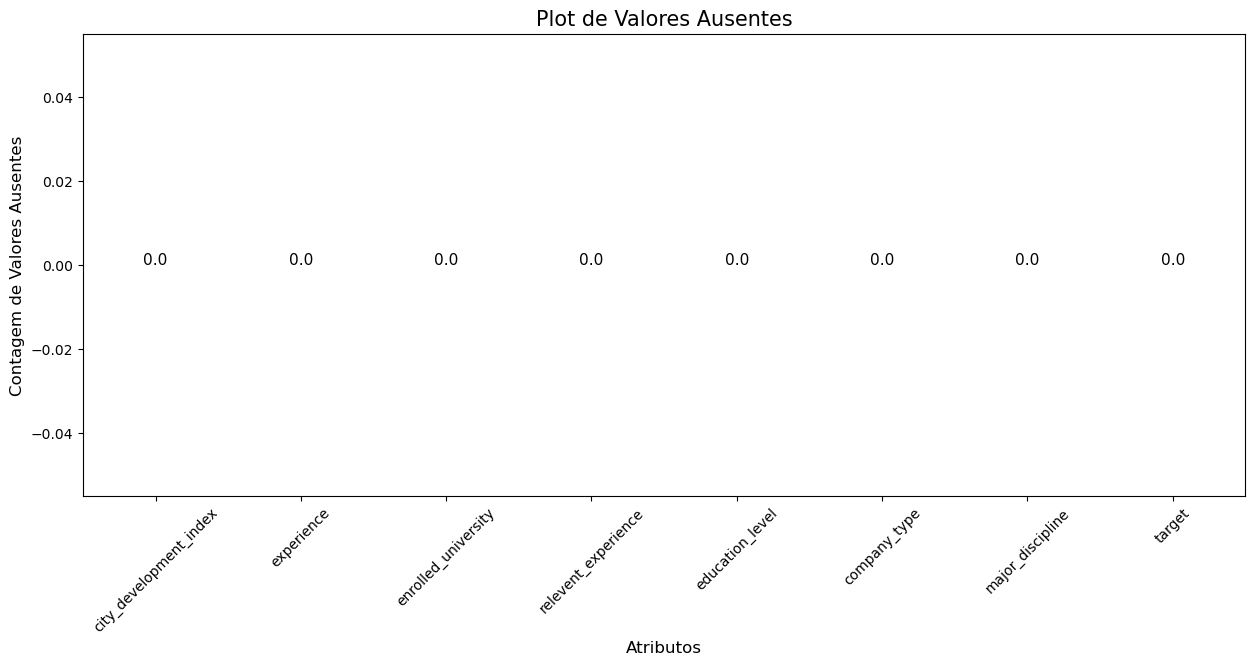

In [88]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,6))

# Barplot
ax = sns.barplot(x = null_df['index'], y =null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

In [89]:
# Ajustando os dados
new_df['enrolled_university'] = new_df['enrolled_university'].replace('no_enrollment', 'No enrollment')

In [90]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,No enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,No enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,No enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [91]:
x = new_df.drop(columns = ['target'])
y = new_df['target']

# FIM

O RH pode tornar o treinamento mais compacto porque muitas pessoas não precisam de muito tempo para concluir o treinamento.
O RH pode procurar candidatos que vêm de cidades com índice de desenvolvimento urbano mais baixo